Importing the basic libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [4]:
y = np.array([1.8, 6.5, 7.1, 13.2, 11.4, 18.9, 19.1, 26.3, 23.0, 31.5, 28.4, 36.9, 34.2, 42.8, 39.6])

Now we need to make our numpy array X as a 2D matrix cus np.shape gives us (rows,) instead of (rows,1) and we would need how many columns to initialise our weights or theta for our model

In [5]:
if X.ndim ==1:
    X = X.reshape(-1,1)

In [6]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [7]:
X.shape

(15, 1)

So now we have our X as an 2d array now we cna take the number of colums and then initialize our theta

In [8]:
y = y.reshape(-1,1)

In [9]:
m,n = X.shape

Visualising our data

Text(0.5, 1.0, 'Visualization of X vs Y')

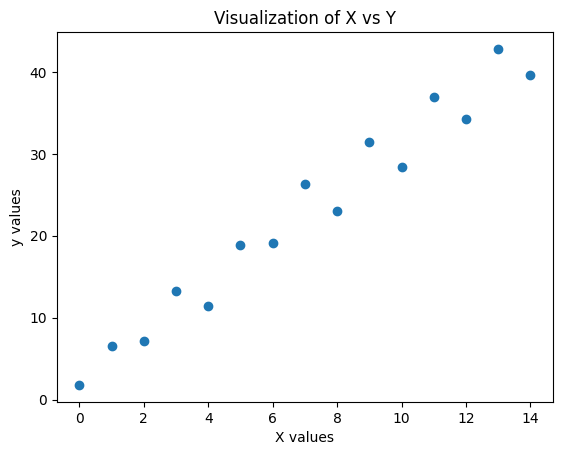

In [10]:
plt.scatter(X,y)
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Visualization of X vs Y")

Initializing our weights(as 0) and we are doing m+1 cause our thetaat first column will be our bias b 

now as our theta would have bias we want to make our x0 = 1 so for doing that 

In [11]:
ones = np.ones((m, 1)) 
X_aug = np.hstack((ones, X))

In [12]:
theta = np.zeros((n+1,1))
theta

array([[0.],
       [0.]])

Now lets make our prediction function that will give prediction acc to our X and theta now

In [13]:
def prediction(X_aug,theta):
    return np.dot(X_aug,theta)

In [14]:
ans = prediction(X_aug,theta)
ans

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Now lets make our loss function which calculates what error we have in this prediction and then we can minimize this loss using gradient descent

In [15]:
def loss(y, ans):
    error = 0
    for i in range(len(y)):
        diff = ans[i][0] - y[i][0]
        error = error + diff * diff
    return error/(2*m)    

So now we have predictions and loss function now e have to minimse this loss for which we use gradient descent here we are doing batch gradiedn descent 


Gradient Descent

In [16]:
def gradient(X_aug, y, theta):
    m = X_aug.shape[0]
    return (X_aug.T @ ((X_aug @ theta) - y)) / m

In [17]:
epochs = 10
rate = 0.01
for i in range(1,epochs):
    ans = prediction(X_aug,theta)
    error = loss(y,ans)
    grad = gradient(X_aug, y, theta)
    theta = theta - rate * grad
    print(f"Epoch {i}, Loss = {error}")   
    

Epoch 1, Loss = 335.7623333333333
Epoch 2, Loss = 37.047943090370346
Epoch 3, Loss = 7.203246058115814
Epoch 4, Loss = 4.2174685286414455
Epoch 5, Loss = 3.9148025878005694
Epoch 6, Loss = 3.8801916330866293
Epoch 7, Loss = 3.872382041978157
Epoch 8, Loss = 3.867273512722328
Epoch 9, Loss = 3.8624584022576105


In [18]:
theta

array([[0.38430501],
       [3.09193579]])

Visualising our data

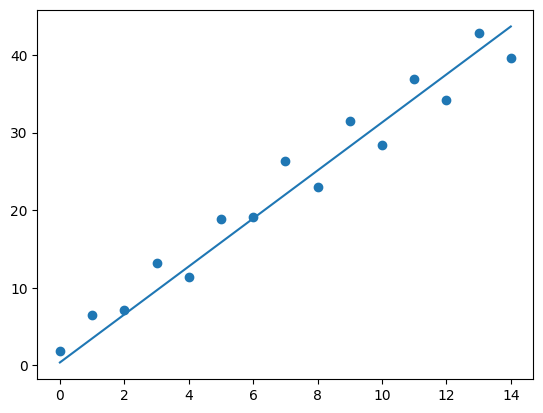

In [20]:
x_line = np.linspace(X.min(), X.max(), 100)
y_line = theta[1] * x_line + theta[0];
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.show()

Ok now we combine all this to our class so we can call directly

In [21]:
class LinearRegression:
    def __init__(self,learning_rate = 0.01,iterations = 30):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def prediction(self,X_aug):
        return np.dot(X_aug,self.theta)
        
    def loss(self,y, ans):
        error = 0
        for i in range(len(y)):
            diff = ans[i][0] - y[i][0]
            error = error + diff * diff
        return error/(2*len(y)) 

    def gradient(self,X_aug, y):
        m = X_aug.shape[0]
        return (X_aug.T @ ((X_aug @ self.theta) - y)) / m
        
    def fit(self,X,y):
        if X.ndim ==1:
            X = X.reshape(-1,1)
        y = y.reshape(-1,1)
        m,n = X.shape
        ones = np.ones((m, 1)) 
        X_aug = np.hstack((ones, X))        
        self.theta = np.zeros((n+1,1))
        for i in range(self.iterations):
            ans = self.prediction(X_aug)
            error = self.loss(y,ans)
            grad = self.gradient(X_aug, y)
            self.theta = self.theta - self.learning_rate * grad
            if(self.iterations - i <50):
                print(f"Epoch {i}, Loss = {error}")         
    def predict(self,X):
        if X.ndim ==1:
            X = X.reshape(-1,1)
        m,n = X.shape
        ones = np.ones((m, 1)) 
        X_aug = np.hstack((ones, X)) 
        preds = self.prediction(X_aug)
        return preds          

ok now taking a bigger synthetic dataset(creating it on our own)

In [46]:
np.random.seed(7)
X1 = np.linspace(0, 150, 200)
noise = np.random.normal(0, 70, size=len(X1))
y1 = 4.5 * X1 + 30 + noise
X1 = X1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)

In [47]:
model = LinearRegression(learning_rate=0.00005, iterations=1000)
model.fit(X1, y1)
preds = model.predict(X1)

Epoch 951, Loss = 2506.149437792352
Epoch 952, Loss = 2506.146843404548
Epoch 953, Loss = 2506.144249082086
Epoch 954, Loss = 2506.1416548249613
Epoch 955, Loss = 2506.1390606331743
Epoch 956, Loss = 2506.1364665067244
Epoch 957, Loss = 2506.1338724456064
Epoch 958, Loss = 2506.1312784498195
Epoch 959, Loss = 2506.1286845193663
Epoch 960, Loss = 2506.126090654241
Epoch 961, Loss = 2506.123496854442
Epoch 962, Loss = 2506.12090311997
Epoch 963, Loss = 2506.1183094508215
Epoch 964, Loss = 2506.1157158469937
Epoch 965, Loss = 2506.1131223084885
Epoch 966, Loss = 2506.1105288353006
Epoch 967, Loss = 2506.107935427434
Epoch 968, Loss = 2506.1053420848784
Epoch 969, Loss = 2506.102748807639
Epoch 970, Loss = 2506.100155595713
Epoch 971, Loss = 2506.0975624490957
Epoch 972, Loss = 2506.0949693677903
Epoch 973, Loss = 2506.0923763517912
Epoch 974, Loss = 2506.0897834010966
Epoch 975, Loss = 2506.0871905157073
Epoch 976, Loss = 2506.084597695622
Epoch 977, Loss = 2506.0820049408353
Epoch 978, L

Visualizing our model performance

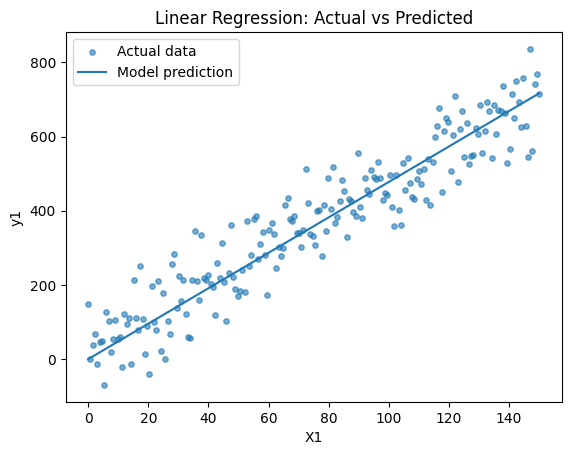

In [49]:
X_plot = X1.reshape(-1)
y_plot = y1.reshape(-1)
preds_plot = preds.reshape(-1)
plt.figure()
plt.scatter(X_plot, y_plot, s=15, alpha=0.6, label="Actual data")

plt.plot(X_plot, preds_plot, label="Model prediction")

plt.xlabel("X1")
plt.ylabel("y1")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

Now comparing with sklearn's model

In [50]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

X = data.data 
y = data.target
y = y.reshape(-1, 1)

In [58]:
model = LinearRegression(learning_rate=0.005, iterations=2000)
model.fit(X, y)
preds_custom = model.predict(X)

Epoch 1951, Loss = 2788.3071114415047
Epoch 1952, Loss = 2788.2235009740466
Epoch 1953, Loss = 2788.1398972066995
Epoch 1954, Loss = 2788.0563001388555
Epoch 1955, Loss = 2787.9727097698733
Epoch 1956, Loss = 2787.889126099147
Epoch 1957, Loss = 2787.8055491260398
Epoch 1958, Loss = 2787.7219788499406
Epoch 1959, Loss = 2787.63841527022
Epoch 1960, Loss = 2787.554858386256
Epoch 1961, Loss = 2787.471308197436
Epoch 1962, Loss = 2787.3877647031286
Epoch 1963, Loss = 2787.3042279027277
Epoch 1964, Loss = 2787.2206977956002
Epoch 1965, Loss = 2787.137174381132
Epoch 1966, Loss = 2787.0536576587074
Epoch 1967, Loss = 2786.9701476276987
Epoch 1968, Loss = 2786.8866442874933
Epoch 1969, Loss = 2786.803147637471
Epoch 1970, Loss = 2786.7196576770225
Epoch 1971, Loss = 2786.636174405519
Epoch 1972, Loss = 2786.5526978223497
Epoch 1973, Loss = 2786.4692279269016
Epoch 1974, Loss = 2786.385764718547
Epoch 1975, Loss = 2786.302308196684
Epoch 1976, Loss = 2786.2188583606858
Epoch 1977, Loss = 278

In [59]:
from sklearn.linear_model import LinearRegression as SklearnLR
model_sklearn = SklearnLR()
model_sklearn.fit(X, y)
preds_sklearn = model_sklearn.predict(X)

In [60]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

print("My MSE:", mse(y, preds_custom))
print("Sklearn MSE:", mse(y, preds_sklearn))

print("My R2:", r2_score(y, preds_custom))
print("Sklearn R2:", r2_score(y, preds_sklearn))

My MSE: 5568.436132927018
Sklearn MSE: 2859.6963475867506
My R2: 0.0609537571583707
Sklearn R2: 0.5177484222203498


Let's try scaling our features cus different fatures have different ranges 

In [64]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std
model = LinearRegression(learning_rate=0.005, iterations=2000)
model.fit(X_scaled, y)
preds = model.predict(X_scaled)

Epoch 1951, Loss = 1439.4000122618395
Epoch 1952, Loss = 1439.399132716291
Epoch 1953, Loss = 1439.3982533225908
Epoch 1954, Loss = 1439.397374080508
Epoch 1955, Loss = 1439.3964949898068
Epoch 1956, Loss = 1439.3956160502585
Epoch 1957, Loss = 1439.3947372616278
Epoch 1958, Loss = 1439.3938586236866
Epoch 1959, Loss = 1439.3929801362087
Epoch 1960, Loss = 1439.392101798966
Epoch 1961, Loss = 1439.3912236117305
Epoch 1962, Loss = 1439.3903455742818
Epoch 1963, Loss = 1439.3894676863877
Epoch 1964, Loss = 1439.3885899478364
Epoch 1965, Loss = 1439.387712358398
Epoch 1966, Loss = 1439.386834917856
Epoch 1967, Loss = 1439.3859576259888
Epoch 1968, Loss = 1439.3850804825802
Epoch 1969, Loss = 1439.3842034874106
Epoch 1970, Loss = 1439.3833266402673
Epoch 1971, Loss = 1439.3824499409345
Epoch 1972, Loss = 1439.3815733891959
Epoch 1973, Loss = 1439.3806969848417
Epoch 1974, Loss = 1439.3798207276584
Epoch 1975, Loss = 1439.3789446174355
Epoch 1976, Loss = 1439.3780686539644
Epoch 1977, Loss 

In [65]:
print("My MSE:", mse(y, preds))
print("My R2:", r2_score(y, preds))

My MSE: 2878.7141780572733
My R2: 0.5145413059270081


Ok so here we can see by scaling our features my mse reduced a lot 